In [18]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib notebook

In [98]:
root_path = '/archive/aes/projects/offline_online_comparison/'
static_path = root_path + 'ocean_annual.static.nc'
woa09_path = root_path + 'offline_woa09/5day/age.0050.0075.nc'
vgrid_path = root_path + 'offline_vgrid/5day/age.0075.0100.nc'
online_path = root_path + 'online/age_4yearbp.0101.0155.nc'
geolat = nc.Dataset(static_path).variables['geolat'][:,:]
geolon = nc.Dataset(static_path).variables['geolon'][:,:]
lat = nc.Dataset(static_path).variables['yh'][:]
lon = nc.Dataset(static_path).variables['xh'][:]
area = nc.Dataset(static_path).variables['areacello'][:,:]
h_vgrid = nc.Dataset(root_path + 'vgrid.hmean.nc').variables['h_end'][:,:,:,:]
h_woa09 = nc.Dataset(root_path + 'woa09.hmean.nc').variables['h_end'][:,:,:,:]
z_vgrid = nc.Dataset(vgrid_path).variables['z_l'][:]
z_woa09 = nc.Dataset(woa09_path).variables['z_l'][:]
z_online = nc.Dataset(online_path).variables['z_l'][:]

In [119]:
age_woa09 = nc.Dataset(woa09_path).variables['age'][0:11,:,:,:].mean(axis=0)
age_vgrid = nc.Dataset(vgrid_path).variables['age'][0:11,:,:,:].mean(axis=0)
age_online = nc.Dataset(online_path).variables['age'][50,:,:,:]

<IPython.core.display.Javascript object>


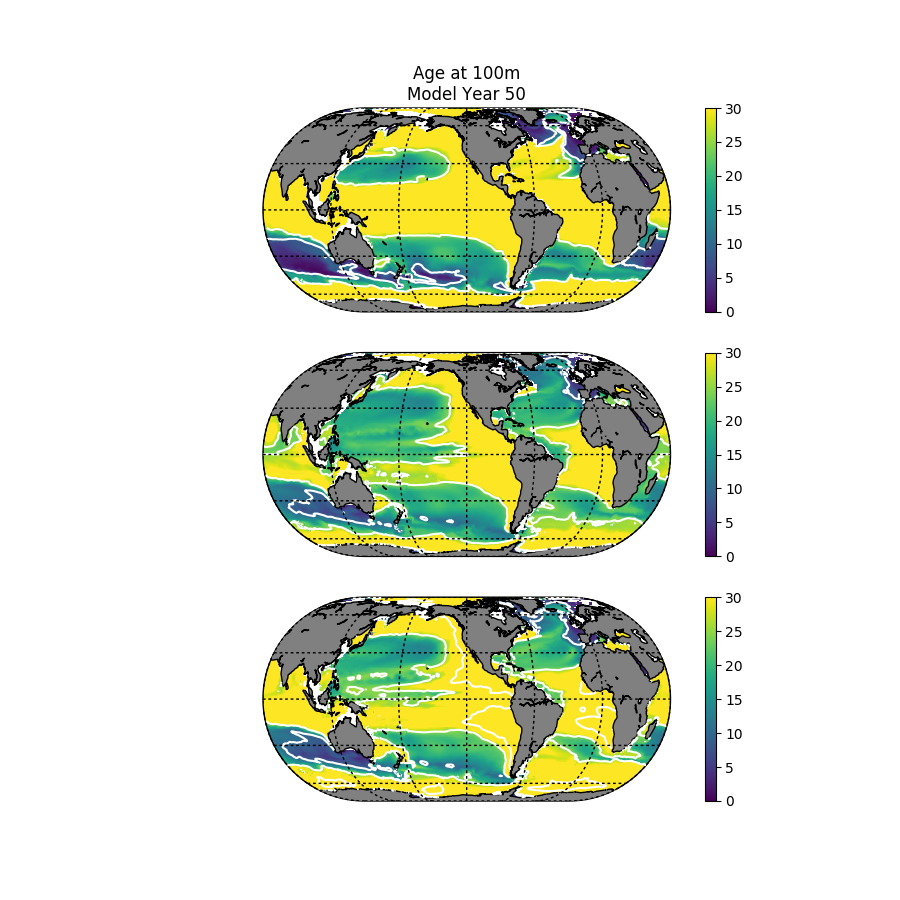

/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


In [139]:
contours = [10,25,50]
depth = 400
idx = np.argmin(np.abs(z_online-depth))
plt.figure(figsize=(9,9))
plt.subplot(3,1,1)
plt.title('Age at 100m\nModel Year 50')
m = Basemap(projection='eck4',lon_0=(-300+60)/2,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='gray')
m.drawparallels(np.arange(-90,120,30))
m.drawmeridians(np.arange(0,380,60))
x,y = m(geolon,geolat)
plt.pcolormesh(x,y,age_online[idx,:,:],vmin=0,vmax=30); plt.colorbar()
plt.contour(x,y,age_online[idx,:,:],levels=contours,colors='white')

idx = np.argmin(np.abs(z_woa09-depth))
plt.subplot(3,1,2)
m = Basemap(projection='eck4',lon_0=(-300+60)/2,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='gray')
m.drawparallels(np.arange(-90,120,30))
m.drawmeridians(np.arange(0,380,60))
x,y = m(geolon,geolat)
plt.pcolormesh(x,y,age_woa09[idx,:,:],vmin=0,vmax=30); plt.colorbar()
plt.contour(x,y,age_woa09[idx,:,:],levels=contours,colors='white')

plt.subplot(3,1,3)
m = Basemap(projection='eck4',lon_0=(-300+60)/2,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='gray')
m.drawparallels(np.arange(-90,120,30))
m.drawmeridians(np.arange(0,380,60))
x,y = m(geolon,geolat)
plt.pcolormesh(x,y,age_vgrid[idx,:,:],vmin=0,vmax=30); plt.colorbar()
plt.contour(x,y,age_vgrid[idx,:,:],levels=contours,colors='white')

<IPython.core.display.Javascript object>


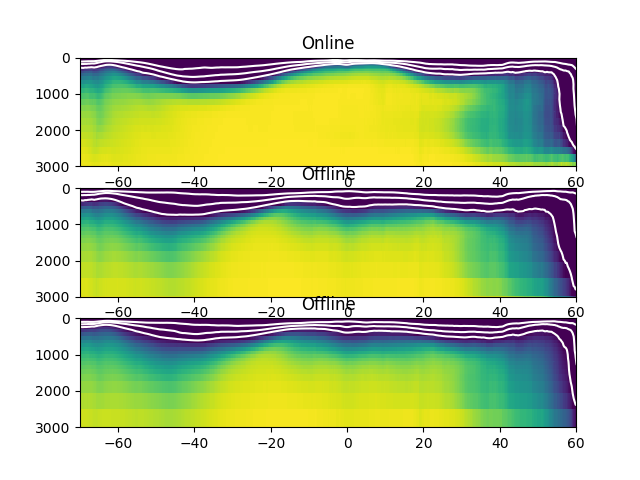

In [141]:
contours = [10,20,30]
plt.figure()
plt.subplot(3,1,1)
plt.pcolormesh(lat,z_online,age_online.mean(axis=2),vmin=30)
plt.contour(lat,z_online,age_online.mean(axis=2),levels=contours,colors='white')
plt.xlim(-70,60)
plt.ylim(0,3000)
plt.gca().invert_yaxis()
plt.title('Online')
plt.subplot(3,1,2)
plt.xlim(-70,60)
plt.ylim(0,3000)
plt.title('Offline')
plt.pcolormesh(lat,z_woa09,age_woa09.mean(axis=2),vmin=30)
plt.contour(lat,z_woa09,age_woa09.mean(axis=2),levels=contours,colors='white')
plt.gca().invert_yaxis()
plt.subplot(3,1,3)
plt.xlim(-70,60)
plt.ylim(0,3000)
plt.title('Offline')
plt.pcolormesh(lat,z_woa09,age_vgrid.mean(axis=2),vmin=30)
plt.contour(lat,z_woa09,age_vgrid.mean(axis=2),levels=contours,colors='white')
plt.gca().invert_yaxis()

In [122]:
age_woa09.max()

50.468242734862791

In [123]:
age_online.max()

50.50011403828082

In [140]:
age_vgrid.max()

75.468241820974654